<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Colab" data-toc-modified-id="Colab-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Colab</a></span><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Imports</a></span></li></ul></li><li><span><a href="#Useful-Scripts" data-toc-modified-id="Useful-Scripts-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Useful Scripts</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Data-Processing" data-toc-modified-id="Data-Processing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Data Processing</a></span><ul class="toc-item"><li><span><a href="#Class-balance" data-toc-modified-id="Class-balance-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Class balance</a></span></li><li><span><a href="#Feature-Selection" data-toc-modified-id="Feature-Selection-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Feature Selection</a></span></li><li><span><a href="#Log-transform" data-toc-modified-id="Log-transform-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Log transform</a></span></li><li><span><a href="#Train-validation-test-split-with-stratify" data-toc-modified-id="Train-validation-test-split-with-stratify-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>Train-validation-test split with stratify</a></span></li><li><span><a href="#Normalize-the-data" data-toc-modified-id="Normalize-the-data-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>Normalize the data</a></span></li></ul></li><li><span><a href="#Modelling:-Keras-Sequential" data-toc-modified-id="Modelling:-Keras-Sequential-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modelling: Keras Sequential</a></span><ul class="toc-item"><li><span><a href="#Bias-Initializer" data-toc-modified-id="Bias-Initializer-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Bias Initializer</a></span></li><li><span><a href="#Class-weights" data-toc-modified-id="Class-weights-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Class weights</a></span></li></ul></li><li><span><a href="#Params-and-Metrics" data-toc-modified-id="Params-and-Metrics-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Params and Metrics</a></span></li><li><span><a href="#Build-the-Model" data-toc-modified-id="Build-the-Model-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Build the Model</a></span><ul class="toc-item"><li><span><a href="#Fit-the-model" data-toc-modified-id="Fit-the-model-8.1"><span class="toc-item-num">8.1&nbsp;&nbsp;</span>Fit the model</a></span></li></ul></li><li><span><a href="#Model-Evaluation" data-toc-modified-id="Model-Evaluation-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Model Evaluation</a></span><ul class="toc-item"><li><span><a href="#Confusion-Matrix" data-toc-modified-id="Confusion-Matrix-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Confusion Matrix</a></span></li><li><span><a href="#Accuracy-Recall-Scores" data-toc-modified-id="Accuracy-Recall-Scores-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Accuracy Recall Scores</a></span></li><li><span><a href="#Training-History-Plots" data-toc-modified-id="Training-History-Plots-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Training History Plots</a></span></li></ul></li><li><span><a href="#Time-Taken" data-toc-modified-id="Time-Taken-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Time Taken</a></span></li></ul></div>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Introduction
Modelling classification problem using keras and tensoroflow.

References:
- https://www.tensorflow.org/tutorials/structured_data/imbalanced_data

# Colab

In [1]:
%%capture
# capture will not print in notebook

import os
import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    ## install modules
    !pip install scikit-plot
    !pip install lrcurve
    !pip install watermark

    ## print
    print('Environment: Google Colaboratory.')

## Imports

In [2]:
import time
time_start_notebook = time.time()

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)


import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

import os
import sys

# random state
SEED = 0
RNG = np.random.RandomState(SEED)

# Jupyter notebook settings for pandas
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 50)

import scipy
from scipy import stats

# scale and split
import sklearn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

# deep learning
import tensorflow as tf
import keras.utils.vis_utils

# model evaluation
import scikitplot
from scikitplot import metrics as skmetrics
import lrcurve
from lrcurve import KerasLearningCurve

# versions
%load_ext watermark
%watermark -a "Bhishan Poudel" -d -v -m
print()
%watermark -iv

Bhishan Poudel 2021-08-08 

CPython 3.7.7
IPython 7.19.0

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit

tensorflow 2.5.0
pandas     1.1.1
keras      2.5.0
scikitplot 0.3.7
scipy      1.4.1
sklearn    0.23.2
seaborn    0.10.1
matplotlib 3.2.1
numpy      1.19.5



# Useful Scripts

In [4]:
def show_methods(method, ncols=3):
    """ Show all the attributes of a given method.
    Example:
    ========
    show_methods(list)
     """
    x = [i for i in dir(method) if i[0]!='_' ]

    return pd.DataFrame(np.array_split(x,ncols)).T.fillna('')

In [5]:
def set_random_seed(seed):
    import os
    import random
    import numpy as np
    import tensorflow as tf
    
    os.environ['PYTHONHASHSEED']=str(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

In [6]:
def model_evaluation(model_name, desc, ytest, yprobs1d,df_eval=None,
                     show=True,sort_col='Recall',threshold=0.5):
    if df_eval is None:
        df_eval = pd.DataFrame({'Model': [],
                        'Description':[],
                        'Accuracy':[],
                        'Precision':[],
                        'Recall':[],
                        'F1':[],
                        'AUC':[],
                        'AUCPR':[],
                    })
  
    # make sure yprobs is float
    if not isinstance(yprobs1d[0],float):
        print("Make sure to use probability values.")
        
    # make sure yprobs is float
    if not isinstance(yprobs1d[0],float):
        print("Make sure to use probability values.")

    # prediction from probs
    ypreds = (yprobs.flatten()>threshold).astype(np.int8)

    # model evaluation
    average = 'binary'
    prec,rec,thr = sklearn.metrics.precision_recall_curve(ytest,yprobs1d)
    auc_pr = sklearn.metrics.auc(rec,prec)
    row_eval = [model_name,desc, 
                sklearn.metrics.accuracy_score(ytest, ypreds),
                sklearn.metrics.precision_score(ytest, ypreds, average=average),
                sklearn.metrics.recall_score(ytest, ypreds, average=average),
                sklearn.metrics.f1_score(ytest, ypreds, average=average),
                sklearn.metrics.roc_auc_score(ytest, yprobs1d),
                auc_pr
                ]

    df_eval.loc[len(df_eval)] = row_eval
    df_eval = df_eval.drop_duplicates()
    df_eval = df_eval.sort_values(sort_col)

    if show:
        display(df_eval.style.background_gradient(subset=[sort_col]))

    return df_eval

# Load the data

In [7]:
ifile = "https://github.com/bhishanpdl/Datasets/blob/master/Projects/Fraud_detection/raw/creditcard.csv.zip?raw=true"
# ifile = '../data/raw/creditcard.csv.zip'

df_raw = pd.read_csv(ifile,compression='zip')
print(df_raw.shape)
df_raw.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Data Processing

## Class balance

0    284315
1       492
Name: Class, dtype: int64

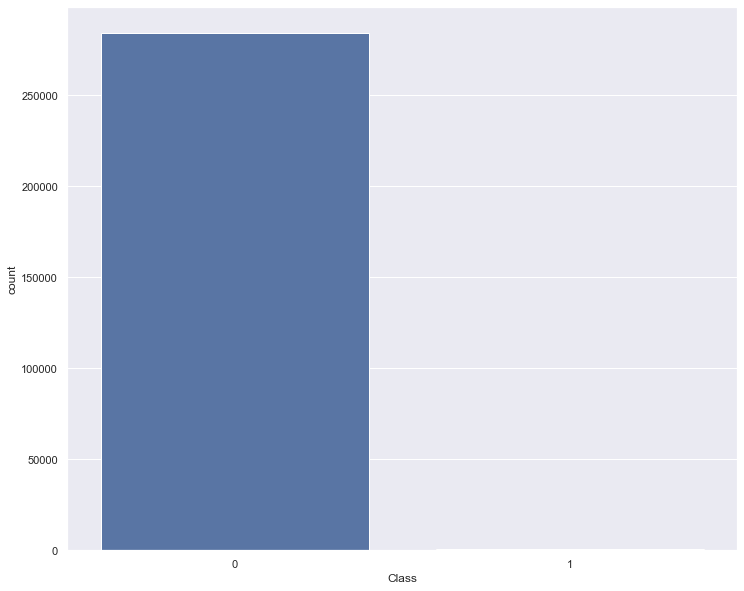

In [8]:
target = 'Class'
display(df_raw[target].value_counts())
sns.countplot(x=df_raw[target])

In [9]:
neg, pos = np.bincount(df_raw['Class'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 284807
    Positive: 492 (0.17% of total)



## Feature Selection

In [10]:
cols_drop = ['Time']

df = df_raw.drop(cols_drop,axis=1)
df.shape

(284807, 30)

## Log transform

In [11]:
eps=0.001 # 0 => 0.1¢
df['Ammount'] = np.log(df.pop('Amount')+eps)

## Train-validation-test split with stratify

In [12]:
from sklearn.model_selection import train_test_split

target = 'Class'

df_Xtrain_orig,df_Xtest,ser_ytrain_orig,ser_ytest = train_test_split(df.drop([target],axis=1),
                                             df[target],
                                             test_size=0.2,
                                             stratify=df[target],
                                             random_state=SEED)

df_Xtrain,df_Xvalid,ser_ytrain,ser_yvalid = train_test_split(df_Xtrain_orig,
                                             ser_ytrain_orig,
                                             test_size=0.2,
                                             stratify=ser_ytrain_orig,
                                             random_state=SEED)

ytrain = np.array(ser_ytrain)
yvalid = np.array(ser_yvalid)
ytest = np.array(ser_ytest)

df.shape, df_Xtrain.shape, ser_ytrain.shape

((284807, 30), (182276, 29), (182276,))

## Normalize the data

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_Xtrain)

Xtrain = scaler.transform(df_Xtrain)
Xvalid = scaler.transform(df_Xvalid)
Xtest  = scaler.transform(df_Xtest)

# clip the values
Xtrain = np.clip(Xtrain, -5, 5)
Xvalid = np.clip(Xvalid, -5, 5)
Xtest = np.clip(Xtest, -5, 5)

# Modelling: Keras Sequential

## Bias Initializer

In [14]:
neg, pos = np.bincount(df_raw['Class'])
total = neg + pos

bias_initializer = np.log([pos/neg])
bias_initializer

array([-6.35935934])

## Class weights

In [15]:
weight_for_0 = (1 / neg)*(total)/2.0 
weight_for_1 = (1 / pos)*(total)/2.0

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 0.50
Weight for class 1: 289.44


# Params and Metrics

In [16]:
n_feats = Xtrain.shape[-1]
class_weight = {0: weight_for_0, 1: weight_for_1}

#============================================================
PARAMS_MODEL = {
    # layer 1
    'L1_units': 16,
    'L1_act': 'relu',
    'L1_dropout': 0.5,

    # optimizer
    'adam_lr': 1e-3,
}

#============================================================
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

#============================================================
PARAMS_FIT = {'epochs': 100,
          'batch_size': 2048,
          'class_weight0': class_weight[0],
          'class_weight1': class_weight[1],
          'patience': 10,
          'shuffle': True,
          }

#============================================================
# callbacks
cb_early = tf.keras.callbacks.EarlyStopping(
    monitor='val_prc', 
    verbose=1,
    patience=PARAMS_FIT['patience'],
    mode='max',
    restore_best_weights=True)

#cb_checkpt = keras.callbacks.ModelCheckpoint("fraud_model_at_epoch_{epoch}.h5")
cb_lr = lrcurve.KerasLearningCurve()
callbacks = [cb_early, cb_lr]

# Build the Model

In [17]:
def make_model(metrics=METRICS, bias_initializer=None,n_feats=n_feats):
    if bias_initializer is not None:
        bias_initializer = tf.keras.initializers.Constant(bias_initializer)

    model = tf.keras.Sequential([
        # layer 1
        tf.keras.layers.Dense(PARAMS_MODEL['L1_units'],
                           activation=PARAMS_MODEL['L1_act'],
                           input_shape=(n_feats,)),

        tf.keras.layers.Dropout(PARAMS_MODEL['L1_dropout']),

        # last layer is dense 1 with activation sigmoid
        # last layer has bias_initializer (but not other layers)
        tf.keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=bias_initializer),
    ])

    model.compile(
      optimizer=tf.keras.optimizers.Adam(learning_rate=PARAMS_MODEL['adam_lr']),
      loss=tf.keras.losses.BinaryCrossentropy(),
      metrics=metrics)

    return model

model = make_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dropout (Dropout)            (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 497
Trainable params: 497
Non-trainable params: 0
_________________________________________________________________


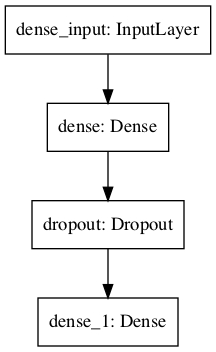

In [18]:
from tensorflow.keras.utils import plot_model

if not os.path.isdir('images'):
    os.makedirs('images')

# save keras sequential model
plot_model(model,'images/keras_model_simple.png')

# For functional model
# plot_model(model, 'keras_model_simple.png')

## Fit the model

In [19]:
%%time
set_random_seed(SEED)
model = make_model(bias_initializer=bias_initializer)

history = model.fit(
    Xtrain,
    ytrain,
    batch_size=PARAMS_FIT['batch_size'],
    epochs=PARAMS_FIT['epochs'],
    callbacks=callbacks,
    validation_data=(Xvalid, yvalid),
    verbose=0,
    class_weight=class_weight
    )

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


Restoring model weights from the end of the best epoch.
Epoch 00012: early stopping
CPU times: user 12.1 s, sys: 1.39 s, total: 13.5 s
Wall time: 16.7 s


# Model Evaluation

## Confusion Matrix

In [20]:
from sklearn import metrics as skmetrics

In [21]:
yprobs = model.predict(Xtest)
yprobs[:5]

array([[0.00412297],
       [0.00278735],
       [0.01056832],
       [0.00396076],
       [0.0061807 ]], dtype=float32)

In [22]:
yprobs1d = yprobs.flatten()

In [23]:
ypreds = (yprobs1d>0.5).astype(np.int8)
ypreds[:5]

array([0, 0, 0, 0, 0], dtype=int8)

In [24]:
skmetrics.confusion_matrix(ytest, ypreds)

array([[56793,    71],
       [   22,    76]])

In [25]:
from scikitplot import metrics as skpmetrics

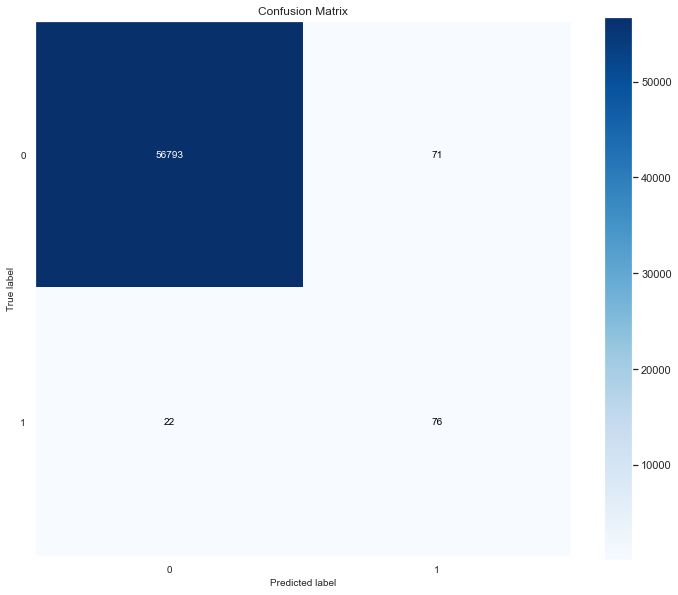

In [26]:
skpmetrics.plot_confusion_matrix(ytest,ypreds)

In [27]:
def plot_cm(labels, predictions, p=0.5):
    cm = sklearn.metrics.confusion_matrix(labels, predictions > p)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title('Confusion matrix @{:.2f}'.format(p))
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print('Legitimate Transactions Detected (True Negatives): ', cm[0][0])
    print('Legitimate Transactions Incorrectly Detected (False Positives): ', cm[0][1])
    print('Fraudulent Transactions Missed (False Negatives): ', cm[1][0])
    print('Fraudulent Transactions Detected (True Positives): ', cm[1][1])
    print('Total Fraudulent Transactions: ', np.sum(cm[1]))

Legitimate Transactions Detected (True Negatives):  56793
Legitimate Transactions Incorrectly Detected (False Positives):  71
Fraudulent Transactions Missed (False Negatives):  22
Fraudulent Transactions Detected (True Positives):  76
Total Fraudulent Transactions:  98


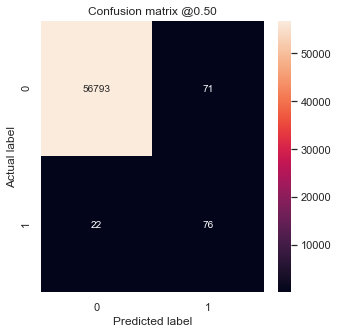

In [28]:
plot_cm(ytest,ypreds)

<div class="alert alert-block alert-success">
<b>NOTE:</b> 
confusion matrix is
TN FP
FN TP

Here, diagonal values are True Negatives and True Postives, ideally we want non-diagonal elements to be zero. But we some mis-predictions.

The top right value is False Positive.
They are not frauds but our model predict them as frauds.
Company needs to send them email to verify if the transaction
is legal or not and if we send too many emails it might annoy the customers.

The bottom left value is False Negative.
They are the actual frauds classified as normal persons by the model. This cost the company money and have to deal with fraudulent cases. This is much more undesirable than False Posivites.

In real life, the trade off much be chosen much carefully so as not to bug too many customers as well as not to miss the frauds.
</div>

## Accuracy Recall Scores

In [29]:
desc = "simple model"
yprobs = model.predict(Xtest)
yprobs1d = yprobs.flatten()

assert len(ytest) == len(yprobs1d)

ypreds = (yprobs1d>0.5).astype(np.int8)

df_eval = model_evaluation("keras", desc, ytest, yprobs1d,df_eval=None)

Make sure to use probability values.
Make sure to use probability values.


,Model,Description,Accuracy,Precision,Recall,F1,AUC,AUCPR
0,keras,simple model,0.998367,0.517007,0.775510,0.620408,0.928138,0.609027


## Training History Plots

In [30]:
matplotlib.rcParams['figure.figsize'] = (12, 10)
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [31]:
def plot_metrics(history):
    metrics =  ['loss', 'auc', 'precision', 'recall']
    for n, metric in enumerate(metrics):
        name = metric.replace("_"," ").capitalize()
        plt.subplot(2,2,n+1)
        plt.plot(history.epoch,  history.history[metric], color=colors[0], label='Train')
        plt.plot(history.epoch, history.history['val_'+metric],
                    color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metric == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metric == 'auc':
            plt.ylim([0.8,1])
        else:
            plt.ylim([0,1])

        plt.legend()

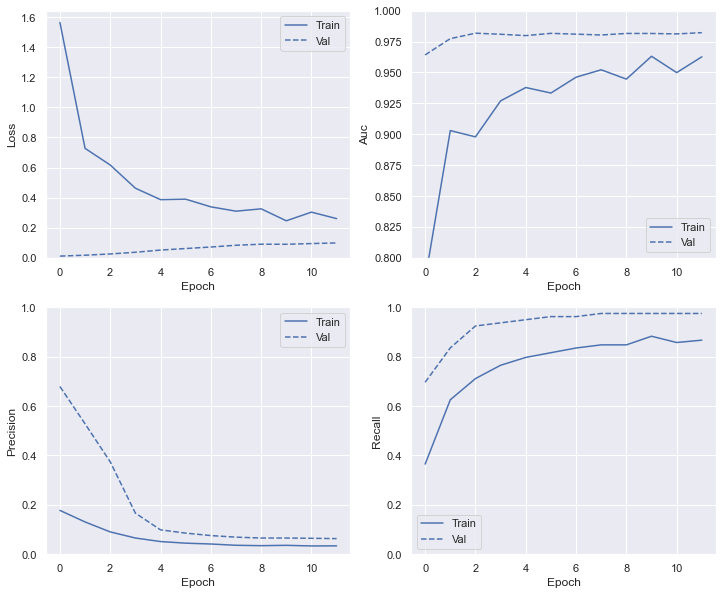

In [32]:
plot_metrics(history)

<div class="alert alert-block alert-danger">
<b>WARNING:</b> 
Here Validation data has more AUC than training, this is because dropout layer is not active when evaluating the model.
</div>

# Time Taken

In [33]:
time_taken = time.time() - time_start_notebook
h,m = divmod(time_taken,60*60)
print('Time taken to run whole notebook: {:.0f} hr '\
      '{:.0f} min {:.0f} secs'.format(h, *divmod(m,60)))

Time taken to run whole notebook: 0 hr 0 min 49 secs
